In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
ds_fitness = pd.read_excel("./실습파일/빅데이터분석.xlsx", sheet_name="FITNESS.원본") #xlrd 최신으로! 안하면 엑셀파일 안 읽어짐. pip install xlrd
ds_fitness1 = pd.read_excel("./실습파일/빅데이터분석.xlsx", sheet_name="FITNESS")
# ds_fitness = pd.read_csv("./실습파일/FITNESS.xlsx", engine = "python")

In [2]:
ds_currency = pd.read_excel("./실습파일/빅데이터분석.xlsx", sheet_name="환율", parse_dates=["APPL_DATE"])
ds_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


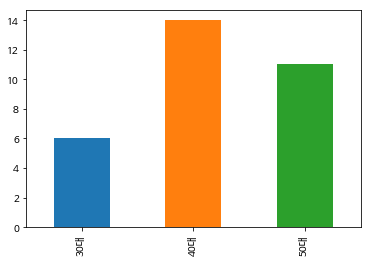

In [3]:
ds_agg = ds_fitness["AGEGROUP"].value_counts()
ds_agg.sort_index(inplace = True)
ds_agg.plot.bar()

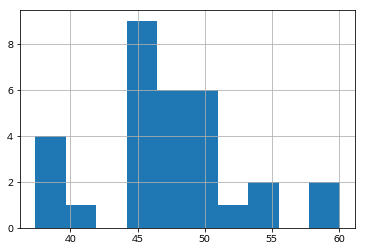

In [4]:
ds_fitness["OXY"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87da5b66a0>,
      dtype=object)

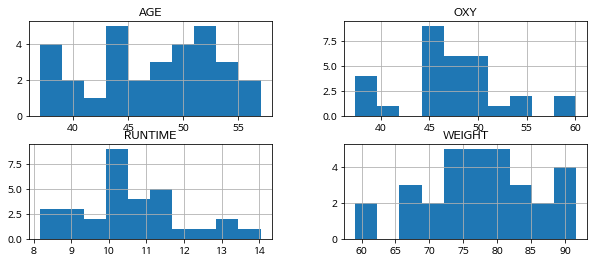

In [5]:
ds_fitness[["WEIGHT","AGE","OXY","RUNTIME"]].hist(figsize=(10,4))

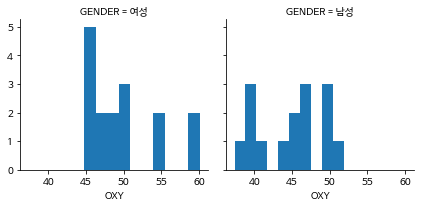

In [6]:
grid = sns.FacetGrid(ds_fitness, col = "GENDER")
grid.map(plt.hist,"OXY")

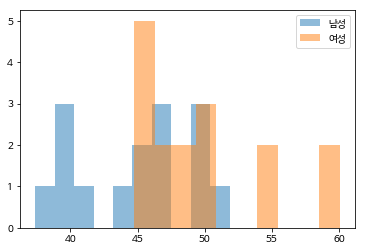

In [7]:
plt.hist(ds_fitness[ds_fitness["GENDER"]=="남성"]["OXY"],label = "남성", alpha = 0.5)
plt.hist(ds_fitness[ds_fitness["GENDER"]=="여성"]["OXY"],label = "여성", alpha = 0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

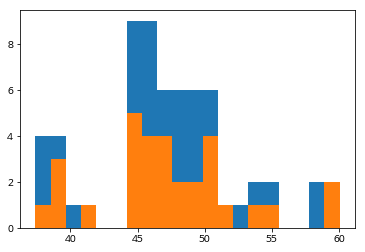

In [8]:
plt.hist(x="OXY",data = ds_fitness)
plt.hist(x="OXY",data = ds_fitness,bins = 20) # 20개로 나눠서 더 세세하게 표현된다.

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

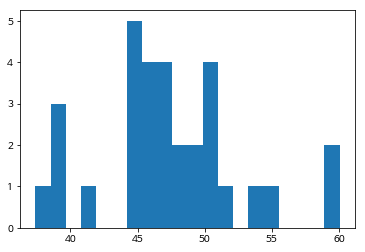

In [9]:
plt.hist(x="OXY",data = ds_fitness,bins = 20) # 20개로 나눠서 더 세세하게 표현된다.

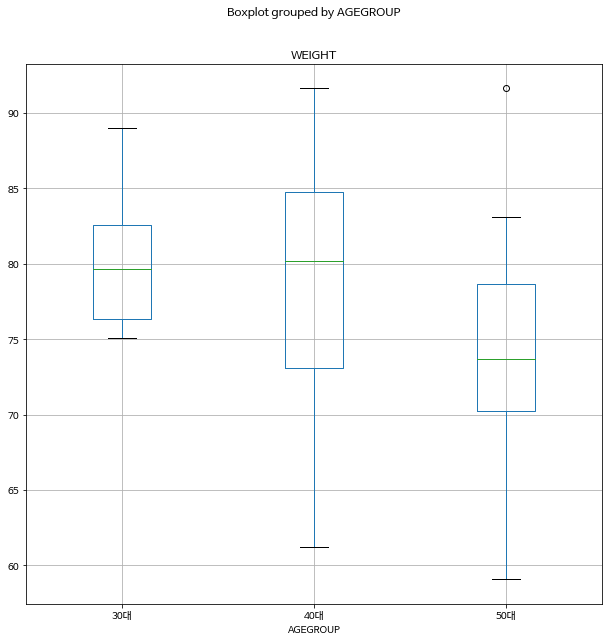

In [10]:
ds_fitness.boxplot(column = "WEIGHT", by = "AGEGROUP", figsize=(10,10))

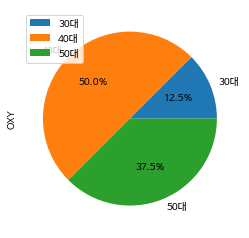

In [11]:
ds_sub = ds_fitness[ds_fitness["OXY"]>=50]
ds_count = ds_sub.groupby("AGEGROUP", as_index = False).agg("count")
ds_count.plot.pie(y="OXY",labels = ds_count["AGEGROUP"],autopct="%.1f%%")

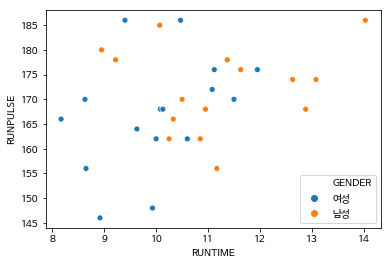

In [12]:
sns.scatterplot(x = "RUNTIME", y = "RUNPULSE", hue = "GENDER", data = ds_fitness)

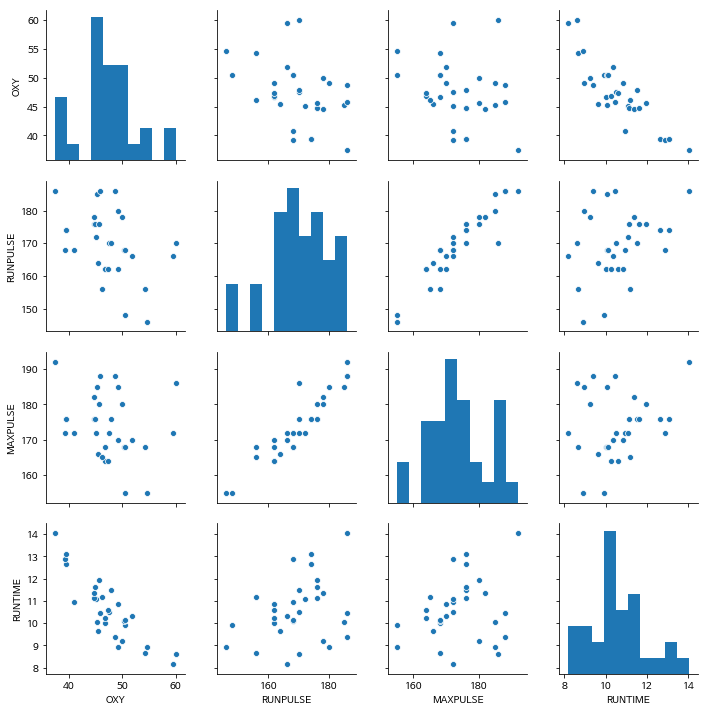

In [13]:
ds_filter = ds_fitness.filter(['OXY','RUNPULSE','MAXPULSE','RUNTIME'])
sns.pairplot(ds_filter)

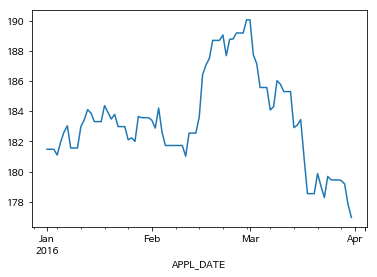

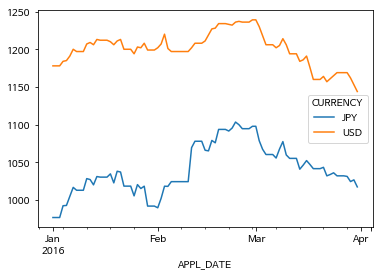

In [14]:
# ds_currency = pd.read_csv("./실습파일/환율.csv", engine = "python", parse_dates = ["APPL_DATE"])
ds_currency_pivot = ds_currency.pivot(index = "APPL_DATE",columns='CURRENCY',values = 'STD_RATE')
ds_currency_pivot["CNY"].plot()
ds_currency_pivot[["JPY",'USD']].plot()

AGEGROUP       30대        40대        50대
GENDER                                  
남성        46.86625  44.410000  43.476200
여성        52.86800  50.427125  48.031833


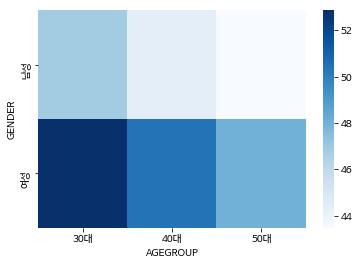

In [23]:
ds_agg = ds_fitness.groupby(["GENDER","AGEGROUP"],as_index = False).agg("mean")
ds_pivot = ds_agg.pivot("GENDER",'AGEGROUP','OXY')
print(ds_pivot)
sns.heatmap(ds_pivot,cmap="Blues")

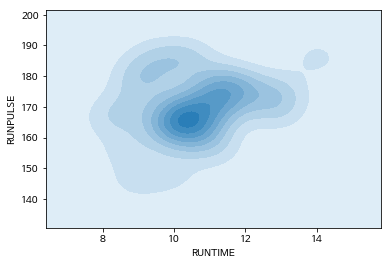

In [21]:
sns.kdeplot(ds_fitness["RUNTIME"],ds_fitness["RUNPULSE"],shade = True)

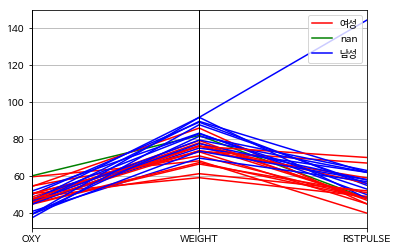

In [33]:
ds_filter = ds_fitness1[["GENDER","OXY","WEIGHT","RSTPULSE"]]
pd.plotting.parallel_coordinates(ds_filter,'GENDER',color=('RED','GREEN','BLUE'))

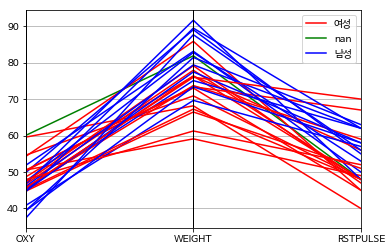

In [34]:
ds_filter2 = ds_filter[ds_filter['RSTPULSE']<100]
pd.plotting.parallel_coordinates(ds_filter2,'GENDER',color = ('RED','GREEN','BLUE'))

In [37]:
ds_fitness1["GENDER"].fillna("여성",inplace = True)
ds_fitness1["WEIGHT"] = ds_fitness['WEIGHT'].fillna(ds_fitness.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)

Text(486.9227272727271, 0.5, '혈당 산소 요구량')

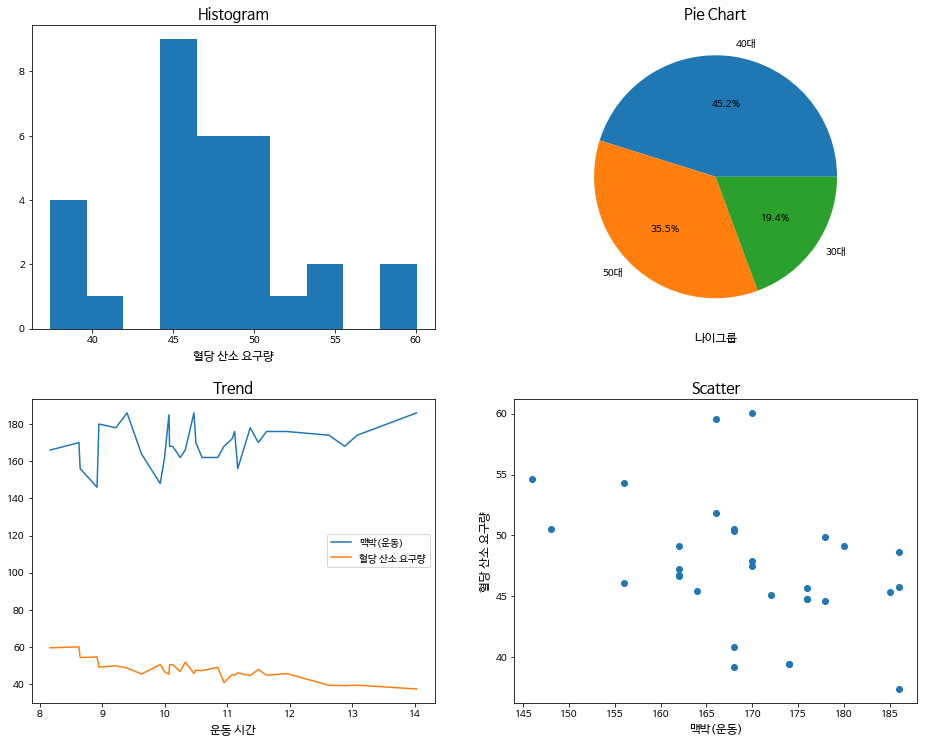

In [43]:
# DashBoard Customizing
ds_count = ds_fitness["AGEGROUP"].value_counts()
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(13,10))
plt.tight_layout(w_pad=5,h_pad=5)
# HISTOGRAM
axes[0,0].hist(ds_fitness["OXY"])
axes[0,0].set_title('Histogram',fontsize = 15)
axes[0,0].set_xlabel('혈당 산소 요구량',fontsize =12)

axes[0,1].pie(ds_count,labels=ds_count.index.tolist(),autopct="%.1f%%")
axes[0,1].set_title('Pie Chart',fontsize = 15)
axes[0,1].set_xlabel('나이그룹',fontsize =12)

axes[1,0].plot("RUNTIME",'RUNPULSE',data=ds_fitness,label="맥박(운동)")
axes[1,0].plot("RUNTIME",'OXY',data=ds_fitness,label="혈당 산소 요구량")
axes[1,0].set_title('Trend',fontsize = 15)
axes[1,0].set_xlabel('운동 시간',fontsize =12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE",'OXY',data=ds_fitness)
axes[1,1].set_title('Scatter',fontsize = 15)
axes[1,1].set_xlabel('맥박(운동)',fontsize =12)
axes[1,1].set_ylabel('혈당 산소 요구량',fontsize =12)

# 빅데이터 분석 II
# 1 .예측 Prediction

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
%matplotlib inline

In [46]:
ds_repair = pd.read_csv("./실습파일/부품수리시간.csv",engine = "python")
ds_repair

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


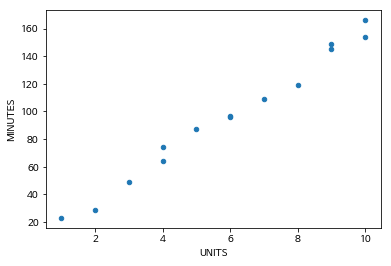

In [47]:
# 목표변수와 설명변수의 산점도
ds_repair.plot.scatter(x="UNITS",y="MINUTES")

In [48]:
# 목표변수와 설명변수의 산점도
ds_repair.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [49]:
# 회귀 모델 생성
ds_repair_x = ds_repair["UNITS"] # unit의 수가 많아질수록
ds_repair_y = ds_repair["MINUTES"] # 목표변수 y인 minutes가 커지는 형태
ds_repair_x_const = sm.add_constant(ds_repair_x) # 절편 만들어 주는 함수
reg_model = sm.OLS(ds_repair_y, ds_repair_x_const) # 
reg_results = reg_model.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           8.92e-13
Time:                        17:26:05   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.2

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


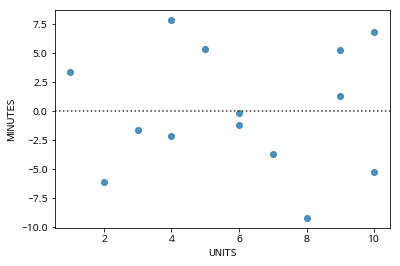

In [52]:
sns.residplot(ds_repair_x,ds_repair_y)

((array([-1.66151682, -1.18948235, -0.88997893, -0.65463235, -0.45108016,
         -0.2648058 , -0.08735875,  0.08735875,  0.2648058 ,  0.45108016,
          0.65463235,  0.88997893,  1.18948235,  1.66151682]),
  array([-1.75219161, -1.40175329, -1.05131497, -0.70087664, -0.70087664,
         -0.35043832,  0.        ,  0.        ,  0.35043832,  0.70087664,
          1.05131497,  1.05131497,  1.40175329,  1.40175329])),
 (1.0930552327010123, 3.172065784643304e-17, 0.9843861971111748))

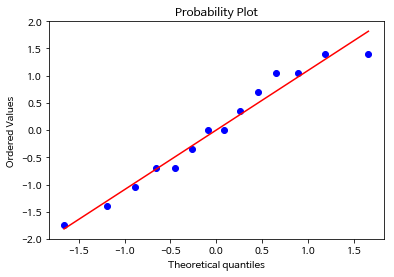

In [53]:
obs = ds_repair_x.values
z = (obs-np.mean(obs))/np.std(obs)
stats.probplot(z,dist='norm',plot=plt)